In [5]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


## Analiza opisowa

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('weatherHistory.csv')

df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Możemy zauważyć na wstępie, że najmniejsza wartość ciśnienia wynosi 0, aby lepiej to zobrazować narysuję wykresy.

In [7]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


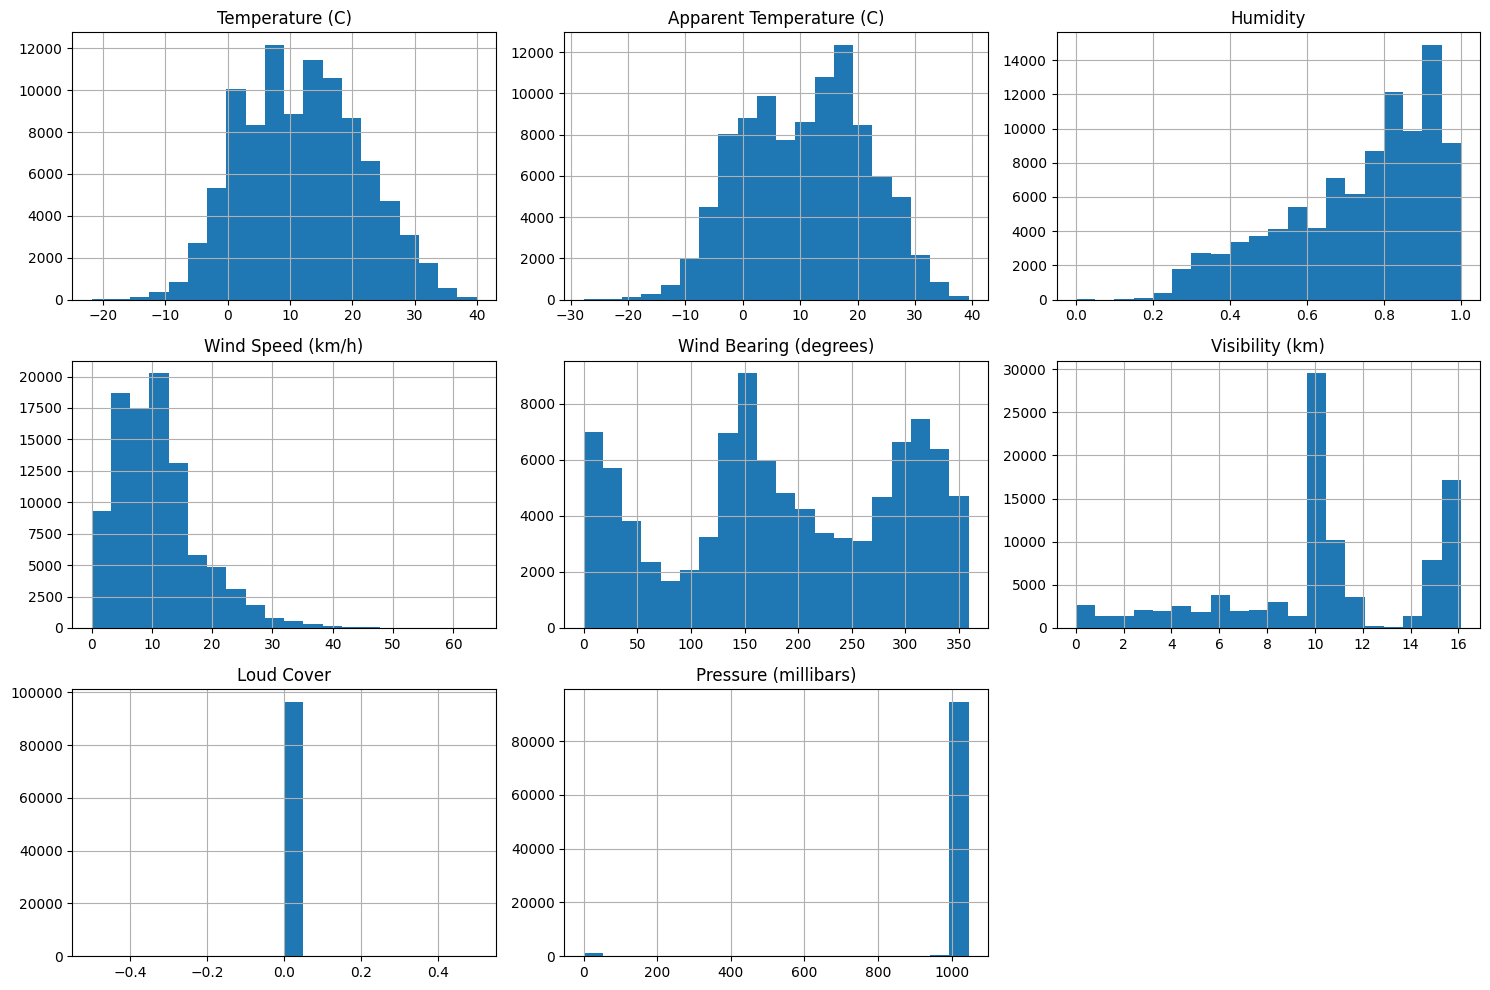

In [8]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=np.number)

numeric_cols.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [9]:
df = df[df['Pressure (millibars)'] >= 1000]


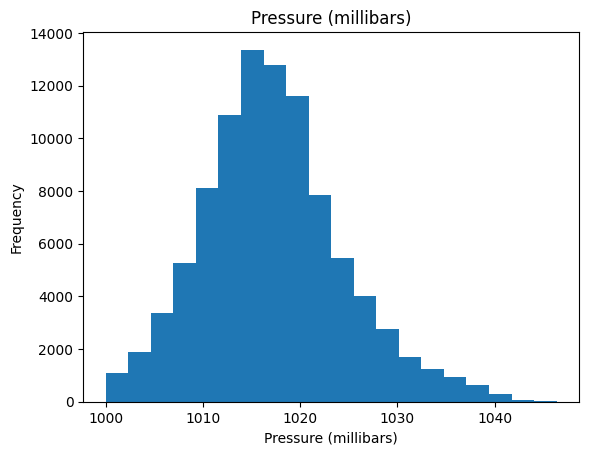

In [10]:
plt.hist(df['Pressure (millibars)'], bins=20)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Pressure (millibars)')
plt.show()


Po usunięciu niepoprawnych wartości, wykres nie wskazuje drastycznie odstających wartości. Następnie narysuję macierz korelacji.

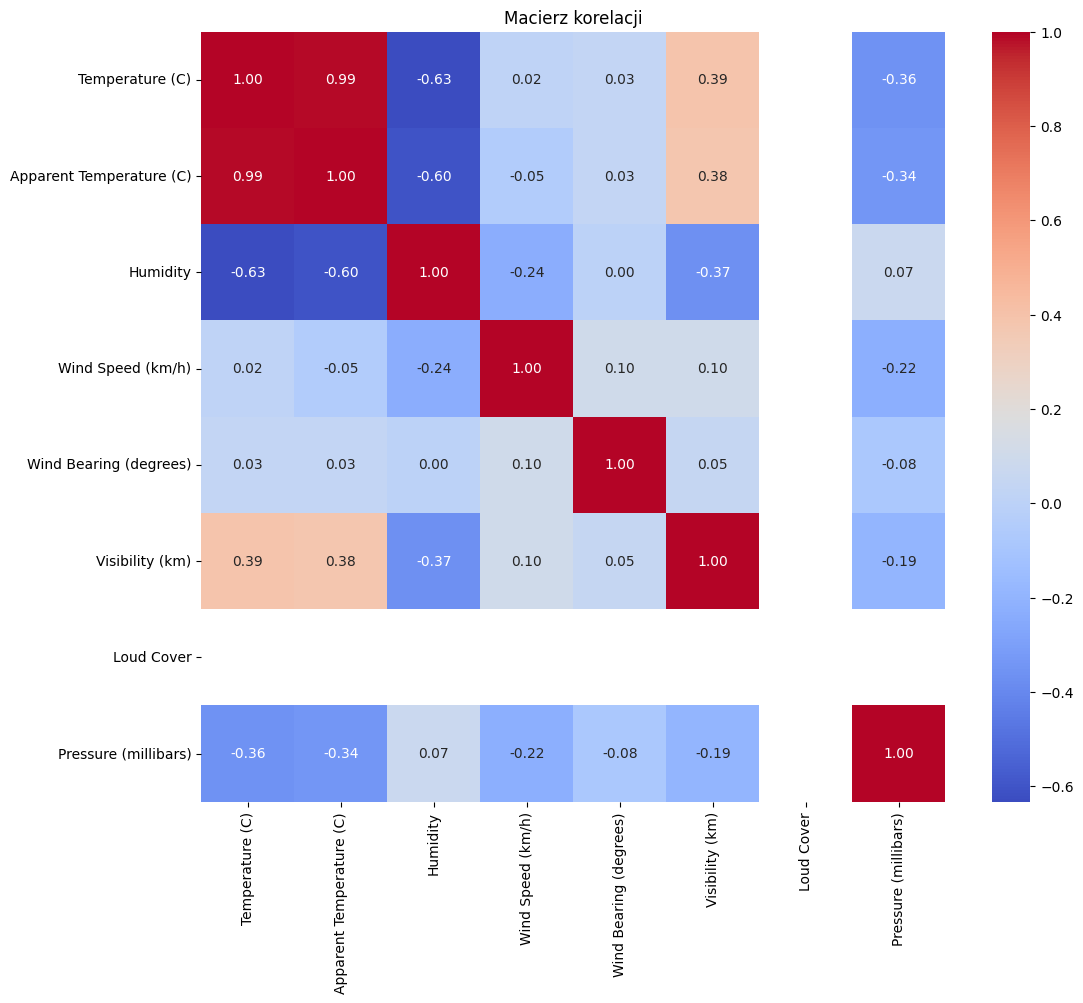

In [11]:
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number)

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()


Temperatura jest bardzo skorelowana z temperaturą odczuwalną ("Apperent Temperature (C)"), nie będę jej brać pod uwagę w dalszych analizach. Podobnie jak zmienna 'Loud Cover' która przyjmuję wartość 0 w każym pomiarze. Skupię się na przewidywaniu klasycznej temperatury.

In [12]:
df = df.drop('Loud Cover', axis=1)


Formatuję datę pomiaru ponieważ będzie ona potrzebna do dalszej analizy

In [13]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc = True)


Dodaję datę pomiaru do zbioru jak zmienną do predykcji.

In [14]:
df['Formatted Date'] = df['Formatted Date'].dt.tz_localize(None)
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [15]:
df = df.set_index('Formatted Date')

Na wykresie temperatury z całego zbioru danych nie widać aby występowału wartości odstające.

<Axes: xlabel='Formatted Date'>

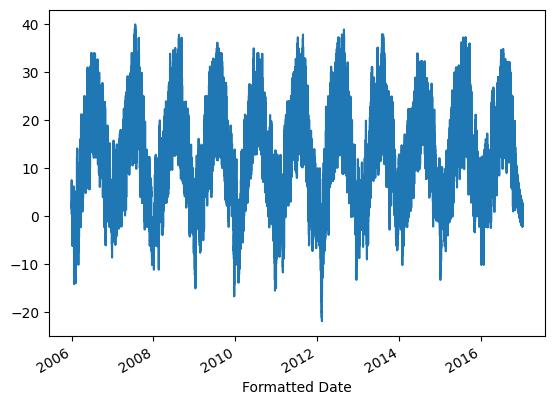

In [16]:
temp_df = pd.DataFrame(df['Temperature (C)'])
temp_df = pd.concat([temp_df, df['Pressure (millibars)']], axis=1)
temp_df['Temperature (C)'].plot()

Do pierwszego modelu wykorzystamy samą temperaturę. Model będzie miał za zadanie przewidzieć wartość temperatury z 5-ciu poprzednich notowań.

In [17]:
temp_df.head()

,Temperature (C),Pressure (millibars)
Formatted Date,,
2006-03-31 22:00:00,9.472222,1015.13
2006-03-31 23:00:00,9.355556,1015.63
2006-04-01 00:00:00,9.377778,1015.94
2006-04-01 01:00:00,8.288889,1016.41
2006-04-01 02:00:00,8.755556,1016.51


Tworzę funkcję która ma za zadanie stworzyć tensor składający się z 5-ciu kolejnych wartości aby przewidzieć następną. Na ten moment ma on przetwarzać jedną zmienną jaką jest temperatura.

In [18]:
def df_X_y(df, win_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-win_size):
    row = [a for a in df_as_np[i:i+win_size]]
    X.append(row)
    label = [df_as_np[i+win_size][0], df_as_np[i+win_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [19]:
window_size = 5
X, y = df_X_y(temp_df, window_size)
X.shape, y.shape

((93354, 5, 2), (93354, 2))

Podział zbioru na uczący, walidacyjny oraz testowy.

In [20]:
X_train, y_train = X[:65350], y[:65350]
X_val, y_val = X[65350:79355], y[65350:79355]
X_test, y_test = X[79355:], y[79355:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((65350, 5, 2),
 (65350, 2),
 (14005, 5, 2),
 (14005, 2),
 (13999, 5, 2),
 (13999, 2))

In [21]:
t_mean = np.mean(X_train[:,:,0])
t_std = np.std(X_train[:,:,0])

p_mean = np.mean(X_train[:,:,1])
p_std = np.std(X_train[:,:,1])

def standarization_X(X):
  X[:,:,0] = (X[:,:,0] - t_mean) / t_std
  X[:,:,1] = (X[:,:,1] - p_mean) / p_std
  return X

def standarization_y(y):
  y[:,0] = (y[:,0] - t_mean) / t_std
  y[:,1] = (y[:,1] - p_mean) / p_std
  return y

In [ ]:
standarization_X(X_train)
standarization_X(X_val)
standarization_X(X_test)

In [ ]:
standarization_y(y_train)
standarization_y(y_val)
standarization_y(y_test)

In [24]:
import tensorflow

# Model 1 - Budowanie pierwszego modelu LSTM.



In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5,2)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(2,'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,690 (69.10 KB)

 Trainable params: 17,690 (69.10 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cp = ModelCheckpoint('model1.keras', save_best_only=True)
model.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [27]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.3263 - root_mean_squared_error: 0.5501 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2352
Epoch 2/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0527 - root_mean_squared_error: 0.2292 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 3/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0335 - root_mean_squared_error: 0.1828 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 4/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0303 - root_mean_squared_error: 0.1739 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1451
Epoch 5/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0298 - root_mean_squared_error: 0.1725 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1421
Epoch 6/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0299 - root_mean_squared_error: 0.1729 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 7/10
2043/2043 ━━━━━━━━━━━━━━

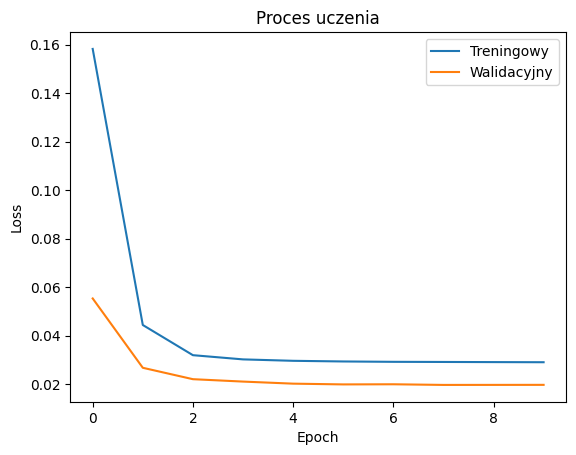

In [28]:
history = model.history.history

plt.plot(history['loss'], label='Treningowy')
plt.plot(history['val_loss'], label='Walidacyjny')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Proces uczenia')
plt.legend()
plt.show()


In [29]:
from tensorflow.keras.models import load_model
model = load_model('model1.keras')

In [30]:
def postprocess_t(df):
  df = (df * t_std) + t_mean
  return df

def postprocess_p(df):
  df = (df * p_std) + p_mean
  return df

In [31]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions_t(model, X, y, start = 0, end = 100): # Rysowanie wykresu predykcji względem wartości z modelu oraz MSE
  pred = model.predict(X)
  t_pred = postprocess_t(pred[:,0])
  t_actual = postprocess_t(y[:,0])
  df = pd.DataFrame(data = {'Przewidywana Temp.':t_pred,
                            'Rzeczywista Tems.':t_actual})
  plt.plot(df['Przewidywana Temp.'][start:end])
  plt.plot(df['Rzeczywista Tems.'][start:end])
  plt.legend(['Przewidywana Temp.', 'Rzeczywista Tems.'])
  return df, mse(t_pred, t_actual)

In [32]:
def plot_predictions_p(model, X, y, start = 0, end = 100): # Rysowanie wykresu predykcji względem wartości z modelu oraz MSE
  pred = model.predict(X)
  p_pred = postprocess_p(pred[:,1])
  p_actual = postprocess_p(y[:,1])
  df = pd.DataFrame(data = {'Przewidywane Ciśnienie':p_pred,
                            'Rzeczywiste Ciśnienie':p_actual})
  plt.plot(df['Przewidywane Ciśnienie'][start:end])
  plt.plot(df['Rzeczywiste Ciśnienie'][start:end])
  plt.legend(['Przewidywane Ciśnienie', 'Rzeczywiste Ciśnienie'])
  return df, mse(p_pred, p_actual)

Wykres przedstawia wyniki na zbiorze testowym. Podana tabela przedstawia wyniki modelu oraz błąd średnio-kwadratowy na zbiorze uczącym.

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


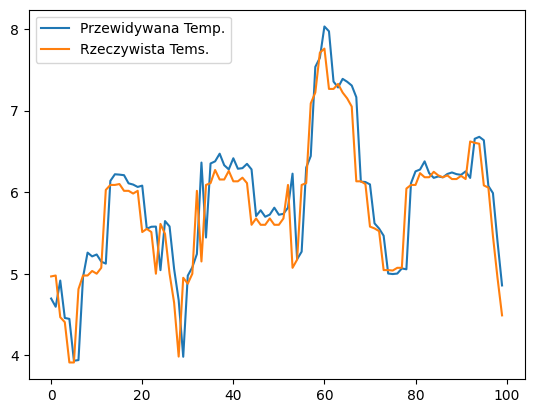

In [33]:
mse_t = plot_predictions_t(model, X_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


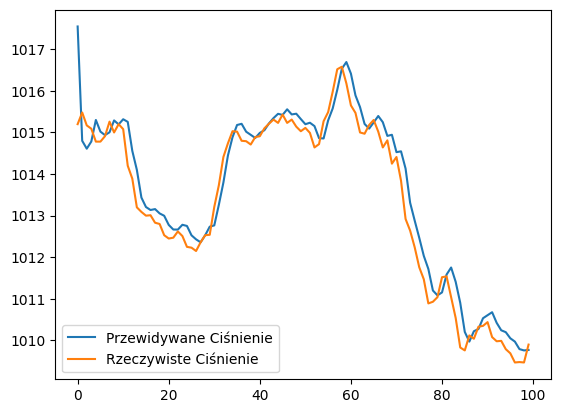

In [34]:
mse_p = plot_predictions_p(model,X_test,y_test)

In [35]:
print(f"MSE dla predykcji temperatury: {mse_t[1]}")
print(f"MSE dla predykcji ciśnienia: {mse_p[1]}")

MSE dla predykcji temperatury: 1.4437194624580674
MSE dla predykcji ciśnienia: 1.0911935964873387


Wyniki pierwszego modelu wyglądają optymistycznie używając tylko poprzednich wartości temperatur lecz widać pewne niedoskonałości. Następnie dodam do modelu więszą ilość zmiennych do predykcji.

## Model 2 - Użycie daty pomiaru jako zmienną do pomocy predykcji temperatury.





In [36]:
temp_df['Sec'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df.head()

,Temperature (C),Pressure (millibars),Sec
Formatted Date,,,
2006-03-31 22:00:00,9.472222,1015.13,1.143842e+09
2006-03-31 23:00:00,9.355556,1015.63,1.143846e+09
2006-04-01 00:00:00,9.377778,1015.94,1.143850e+09
2006-04-01 01:00:00,8.288889,1016.41,1.143853e+09
2006-04-01 02:00:00,8.755556,1016.51,1.143857e+09


In [37]:
# https://blog.davidkaleko.com/feature-engineering-cyclical-features.html - pomysł zaczerpnięty z bloga aby użyć daty jako time-stamp'u do predykcji temperatury

day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Sec'] * (2 * np.pi / day) )
temp_df['Day cos'] = np.cos(temp_df['Sec'] * (2 * np.pi / day) )
temp_df['Tear sin'] = np.sin(temp_df['Sec'] * (2 * np.pi / year) )
temp_df['Tear cos'] = np.cos(temp_df['Sec'] * (2 * np.pi / year) )
temp_df.head()

,Temperature (C),Pressure (millibars),Sec,Day sin,Day cos,Tear sin,Tear cos
Formatted Date,,,,,,,
2006-03-31 22:00:00,9.472222,1015.13,1.143842e+09,-5.000000e-01,0.866025,0.999813,0.019334
2006-03-31 23:00:00,9.355556,1015.63,1.143846e+09,-2.588190e-01,0.965926,0.999827,0.018617
2006-04-01 00:00:00,9.377778,1015.94,1.143850e+09,-4.187642e-12,1.000000,0.999840,0.017901
2006-04-01 01:00:00,8.288889,1016.41,1.143853e+09,2.588190e-01,0.965926,0.999852,0.017184
2006-04-01 02:00:00,8.755556,1016.51,1.143857e+09,5.000000e-01,0.866025,0.999864,0.016467


Po transformacji daty pomiaru, otrzymujemy nastepujący zbiór danych. Dzięki takiej reprezentacji model potencjalnie zwiększy swoją wydajność ze względu na cykliczość temperatury względem roku.

In [38]:
temp_df = temp_df.drop('Sec', axis=1)
temp_df.head()

,Temperature (C),Pressure (millibars),Day sin,Day cos,Tear sin,Tear cos
Formatted Date,,,,,,
2006-03-31 22:00:00,9.472222,1015.13,-5.000000e-01,0.866025,0.999813,0.019334
2006-03-31 23:00:00,9.355556,1015.63,-2.588190e-01,0.965926,0.999827,0.018617
2006-04-01 00:00:00,9.377778,1015.94,-4.187642e-12,1.000000,0.999840,0.017901
2006-04-01 01:00:00,8.288889,1016.41,2.588190e-01,0.965926,0.999852,0.017184
2006-04-01 02:00:00,8.755556,1016.51,5.000000e-01,0.866025,0.999864,0.016467


Tworzę nową funkcje do tworzenia tensora dla danych wejściowych. Teraz tensor zawiera 5 wartości które mają przewidywać przyszłą wartość temperatury.

In [39]:
def dt_X_y(df, win_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-win_size):
    row = [a for a in df_as_np[i:i+win_size]]
    X.append(row)
    label = [df_as_np[i+win_size][0],df_as_np[i+win_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [40]:
X2, y2 = dt_X_y(temp_df, 5)
X2.shape, y2.shape

((93354, 5, 6), (93354, 2))

In [41]:
X2_train, y2_train = X2[:65350], y2[:65350]
X2_val, y2_val = X2[65350:79355], y2[65350:79355]
X2_test, y2_test = X2[79355:], y2[79355:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((65350, 5, 6),
 (65350, 2),
 (14005, 5, 6),
 (14005, 2),
 (13999, 5, 6),
 (13999, 2))

In [ ]:
standarization_X(X2_train)
standarization_X(X2_val)
standarization_X(X2_test)

In [ ]:
standarization_y(y2_train)
standarization_y(y2_val)
standarization_y(y2_test)

In [44]:
model2 = Sequential()
model2.add(InputLayer((5,6)))
model2.add(LSTM(64))
model2.add(Dense(8,'relu'))
model2.add(Dense(2,'linear'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
cp2 = ModelCheckpoint('model2.keras', save_best_only=True)
model2.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [46]:
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp2])

Epoch 1/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.3946 - root_mean_squared_error: 0.6045 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2095
Epoch 2/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0442 - root_mean_squared_error: 0.2102 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1719
Epoch 3/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1478
Epoch 4/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0289 - root_mean_squared_error: 0.1699 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1404
Epoch 5/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1399
Epoch 6/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0260 - root_mean_squared_error: 0.1613 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 7/10
2043/2043 ━━━━━━━━━━━━━

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


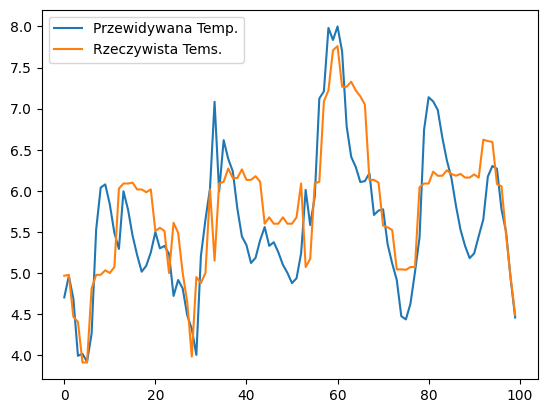

In [47]:
mse_t2 = plot_predictions_t(model2, X2_test, y2_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


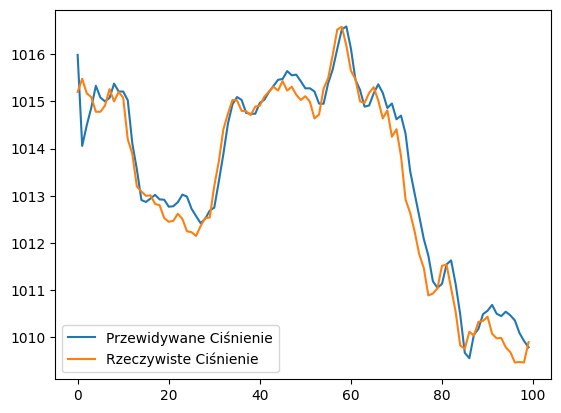

In [48]:
mse_p2 = plot_predictions_p(model2, X2_test, y2_test)

In [49]:
print(f"MSE dla predykcji temperatury: {mse_t2[1]}")
print(f"MSE dla predykcji ciśnienia: {mse_p2[1]}")

MSE dla predykcji temperatury: 1.0867380998673226
MSE dla predykcji ciśnienia: 1.048575703022873


Dodanie reprezentacji daty pomiaru poprawiło wydajność modelu oraz zmniejszyło błąd średnio-kwadratowy.

## Model 3 - Dodanie pozostałych zmiennych



In [50]:
ptemp_df = pd.concat([temp_df,df['Humidity'],df['Wind Speed (km/h)'],df['Wind Bearing (degrees)'],df['Visibility (km)']],axis = 1)
ptemp_df.head()

,Temperature (C),Pressure (millibars),Day sin,Day cos,Tear sin,Tear cos,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00,9.472222,1015.13,-5.000000e-01,0.866025,0.999813,0.019334,0.89,14.1197,251.0,15.8263
2006-03-31 23:00:00,9.355556,1015.63,-2.588190e-01,0.965926,0.999827,0.018617,0.86,14.2646,259.0,15.8263
2006-04-01 00:00:00,9.377778,1015.94,-4.187642e-12,1.000000,0.999840,0.017901,0.89,3.9284,204.0,14.9569
2006-04-01 01:00:00,8.288889,1016.41,2.588190e-01,0.965926,0.999852,0.017184,0.83,14.1036,269.0,15.8263
2006-04-01 02:00:00,8.755556,1016.51,5.000000e-01,0.866025,0.999864,0.016467,0.83,11.0446,259.0,15.8263


In [51]:
def df_to_X_y3(df, win_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-win_size):
    row = [a for a in df_as_np[i:i+win_size]]
    X.append(row)
    label = [df_as_np[i+win_size][0], df_as_np[i+win_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [52]:
X3, y3 = df_to_X_y3(ptemp_df, 5)
X3.shape, y3.shape

((93354, 5, 10), (93354, 2))

In [53]:
X3_train, y3_train = X3[:65350],y3[:65350]
X3_val, y3_val = X3[65350:79355], y3[65350:79355]
X3_test, y3_test = X3[79355:], y3[79355:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((65350, 5, 10),
 (65350, 2),
 (14005, 5, 10),
 (14005, 2),
 (13999, 5, 10),
 (13999, 2))

Standaryzacja zmiennych aby zmniejszyć ich zakresy.

In [54]:
t_mean = np.mean(X3_train[:,:,1])
t_std = np.std(X3_train[:,:,1])

p_mean = np.mean(X3_train[:,:,0])
p_std = np.std(X3_train[:,:,0])

ws_mean = np.mean(X3_train[:,:,7])
ws_std = np.std(X3_train[:,:,7])

wb_mean = np.mean(X3_train[:,:,8])
wb_std = np.std(X3_train[:,:,8])

vis_mean = np.mean(X3_train[:,:,9])
vis_std = np.std(X3_train[:,:,9])

def standarization_X(X):
  X[:,:,1] = (X[:,:,1] - t_mean) / t_std
  X[:,:,0] = (X[:,:,0] - p_mean) / p_std
  X[:,:,7] = (X[:,:,7] - ws_mean) / ws_std
  X[:,:,8] = (X[:,:,8] - wb_mean) / wb_std
  X[:,:,9] = (X[:,:,9] - vis_mean) / vis_std
  return X

def standarization_y(y):
  y[:,1] = (y[:,1] - t_mean) / t_std
  y[:,0] = (y[:,0] - p_mean) / p_std
  return y

In [ ]:
standarization_X(X3_train)
standarization_X(X3_val)
standarization_X(X3_test)

In [ ]:
standarization_y(y3_train)
standarization_y(y3_val)
standarization_y(y3_test)

In [57]:
model3 = Sequential()
model3.add(InputLayer((5,10)))
model3.add(LSTM(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(2,'linear'))

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,738 (77.10 KB)

 Trainable params: 19,738 (77.10 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
cp3 = ModelCheckpoint('model3.keras', save_best_only=True)
model3.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [59]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp3])

Epoch 1/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.3765 - root_mean_squared_error: 0.5958 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1975
Epoch 2/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0393 - root_mean_squared_error: 0.1982 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1663
Epoch 3/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0318 - root_mean_squared_error: 0.1783 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1517
Epoch 4/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0280 - root_mean_squared_error: 0.1672 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449
Epoch 5/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0274 - root_mean_squared_error: 0.1654 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 6/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0270 - root_mean_squared_error: 0.1643 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 7/10
2043/2043 ━━━━━━━━━━━━━━━

In [60]:
def postprocess_t(df):
  df = (df * t_std) + t_mean
  return df

def postprocess_p(df):
  df = (df * p_std) + p_mean
  return df

In [61]:
def post_plot_pred_p(model, X, y, start = 0, end = 100):
  pred = model.predict(X)
  p_pred = postprocess_p(pred[:,0])
  p_actual = postprocess_p(y[:,0])
  df = pd.DataFrame(data = {'Przewidywane Ciśnienie': p_pred,
                            'Rzeczywiste ciśnienie':p_actual})
  plt.plot(df['Przewidywane Ciśnienie'][start:end])
  plt.plot(df['Rzeczywiste ciśnienie'][start:end])
  plt.legend(['Przewidywane Ciśnienie', 'Rzeczywiste ciśnienie'])
  return df.head(), mse(p_pred, p_actual)

In [62]:
def post_plot_pred_t(model, X, y, start = 0, end = 100):
  pred = model.predict(X)
  t_pred = postprocess_t(pred[:,1])
  t_actual = postprocess_t(y[:,1])
  df = pd.DataFrame(data = {'Przewidywana Temp.': t_pred,
                            'Rzeczywista Temp.':t_actual})
  plt.plot(df['Przewidywana Temp.'][start:end])
  plt.plot(df['Rzeczywista Temp.'][start:end])
  plt.legend(['Przewidywana Temp.', 'Rzeczywista Temp.'])
  return df.head(), mse(t_pred, t_actual)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


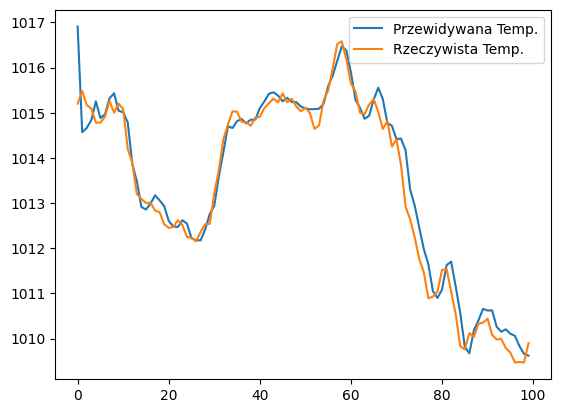

In [63]:
mse_t3=post_plot_pred_t(model3, X3_test,y3_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


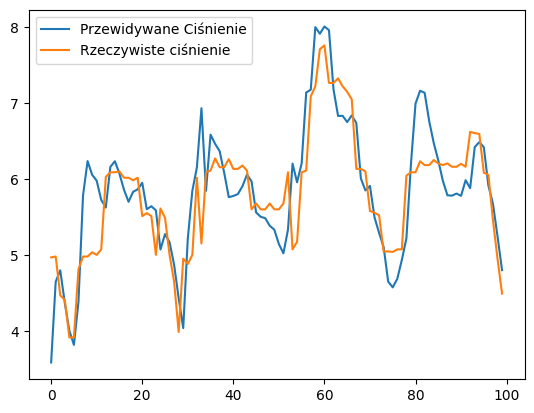

In [64]:
mse_p3 = post_plot_pred_p(model3, X3_test,y3_test)

In [65]:
print(f"MSE dla predykcji temperatury: {mse_t3[1]}")
print(f"MSE dla predykcji ciśnienia: {mse_p3[1]}")

MSE dla predykcji temperatury: 1.1008890718133115
MSE dla predykcji ciśnienia: 1.1500152585921966


# Podsumowanie modeli

In [66]:
mse_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'MSE Temperatura': [mse_t[1], mse_t2[1], mse_t3[1]],
    'MSE Ciśnienie': [mse_p[1], mse_p2[1], mse_p3[1]]
}

mse_df = pd.DataFrame(mse_data).set_index('Model')
print(mse_df)


         MSE Temperatura  MSE Ciśnienie
Model                                  
Model 1         1.443719       1.091194
Model 2         1.086738       1.048576
Model 3         1.100889       1.150015
